In [378]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")

In [379]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV)
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [380]:
head(taxa_16S)

Feature.ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
000967513bd1d4cb51b4ae7afbeed4dc,d__Bacteria,p__Acidobacteriota,c__Holophagae,o__Acanthopleuribacterales,f__Acanthopleuribacteraceae,g__Acanthopleuribacter,s__uncultured_bacterium,ASV_1
0012e79eda7972a4a12492475df662bd,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__Aquimarina,s__Aquimarina_salinaria,ASV_2
001f7fb00fb7754df232a1d66e219565,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingorhabdus,NA,ASV_3
0026003a1d59f9f99ad87f00257ee192,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Micavibrionales,f__uncultured,g__uncultured,s__uncultured_bacterium,ASV_4
0031b7578aa4158302744105e9c463ed,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,f__Alteromonadaceae,g__uncultured,s__uncultured_marine,ASV_5
003b6df8106c04e650b4d51c08ce03b7,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Nitrincolaceae,g__Marinobacterium,NA,ASV_6


In [381]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

meta$Survivorship <- factor(meta$Survivorship , 
    levels = c("Susceptible", "Resistant", "NA"))


In [382]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [500]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41","U44")) 
ps






phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 234 samples ]
sample_data() Sample Data:       [ 234 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [491]:
ps_df=as.data.frame(sample_data(ps))

In [496]:
write.csv(sample_data(ps), file="/Users/stephanie.rosales/Documents/omics_projects/Resitada/subset_resistada.csv",
            )

In [501]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!="g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_clip_nr =subset_taxa(ps_Clipped, Genus!="g__MD3-55" )
ps_clip_nr

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_Am_Pl_c =subset_samples(ps_paired, Combo=="Ambient_Placebo")
ps_Am_Pl_c

ps_Am_Pa_c =subset_samples(ps_paired, Combo=="Ambient_Pathogen")
ps_Am_Pa_c

ps_NH_Pl_c =subset_samples(ps_paired, Combo=="NH4_Placebo")
ps_NH_Pl_c

ps_NH_Pa_c =subset_samples(ps_paired, Combo=="NH4_Pathogen")
ps_NH_Pa_c


ps_Am_Pl_ALL =subset_samples(ps, Combo=="Ambient_Placebo" & Type=="Clipped")
#ps_Am_Pl_ALL =subset_samples(ps, Type!="Neg")
ps_Am_Pl_ALL

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 175 samples ]
sample_data() Sample Data:       [ 175 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 175 samples ]
sample_data() Sample Data:       [ 175 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 113 samples ]
sample_data() Sample Data:       [ 113 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 22 samples ]
sample_data() Sample Data:       [ 22 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [502]:
sample_data(ps_Am_Pl_ALL)$Type

[1] "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped"
 [8] "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped"
[15] "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped"
[22] "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped"
[29] "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped" "Clipped"
[36] "Clipped" "Clipped" "Clipped"

In [511]:
sample_data(ps_paired) %>%
  group_by(Combo, Health) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.



Combo,Health,Paired
<chr>,<chr>,<int>
Ambient_Pathogen,DL,22
Ambient_Placebo,AH,30
NH4_Pathogen,DL,27
NH4_Placebo,AH,29
NH4_Placebo,DL,5


In [503]:
ps_fill_razor = filter_taxa(ps_razor, function(x) sum(x > 10) > (0.015*length(x)), TRUE)
ps_fill_razor 
                            
ps_fill_razor_nr = filter_taxa(ps_razor_nr, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor_nr                          

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_clip
                           
ps_fill_clip_nr = filter_taxa(ps_clip_nr, function(x) sum(x > 5) > (0.001*length(x)), TRUE)
ps_fill_clip_nr                           

ps_fill_neg = filter_taxa(ps_neg, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_neg                         
   
                                                      
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 10) > (0.015*length(x)), TRUE)
ps_fill_pair  
                           
                                       
                             
ps_fill_Am_Pl = filter_taxa(ps_Am_Pl_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_Am_Pl    

ps_fill_Am_Pa = filter_taxa(ps_Am_Pa_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_Am_Pa   
                             
ps_fill_NH_Pl = filter_taxa(ps_NH_Pl_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_NH_Pl    

ps_fill_NH_Pa = filter_taxa(ps_NH_Pa_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_NH_Pa  
                            
ps_Am_Pl_ALL = filter_taxa(ps_Am_Pl_ALL, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_Am_Pl_ALL                          

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 391 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 391 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 391 tips and 337 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 326 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 326 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 326 tips and 303 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1472 taxa and 175 samples ]
sample_data() Sample Data:       [ 175 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1472 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1472 tips and 1236 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4131 taxa and 175 samples ]
sample_data() Sample Data:       [ 175 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 4131 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4131 tips and 3680 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 245 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 245 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 245 tips and 220 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1198 taxa and 113 samples ]
sample_data() Sample Data:       [ 113 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1198 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1198 tips and 1016 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 918 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 918 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 918 tips and 850 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1159 taxa and 22 samples ]
sample_data() Sample Data:       [ 22 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1159 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1159 tips and 1031 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 887 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 887 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 887 tips and 791 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1563 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1563 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1563 tips and 1391 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 990 taxa and 38 samples ]
sample_data() Sample Data:       [ 38 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 990 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 990 tips and 918 internal nodes ]

# Pathogen in Placebo categorical 

In [507]:
out = ancombc(phyloseq = ps_fill_Am_Pa, formula = "Survivorship", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Survivorship", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = TRUE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, SurvivorshipResistant, SurvivorshipResistantSD)%>%
  mutate(group = ifelse(SurvivorshipResistant > 0, "Resistant", "Susceptible"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(SurvivorshipResistant)  %>%
filter(SurvivorshipResistant=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=SurvivorshipResistant)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_APa = subset_samples(ps2,
                     Combo=="Ambient_Pathogen"& Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,SurvivorshipResistant
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,-0.6474583
2,09076d07bd26f0e323724b55aecd1f3d,0.0000000
3,a24e19ec3a1891f7fee6cfa389fc09bd,1.2101251
4,fea4638d48e009fdfdec27a381a41b41,-0.3048242
5,6814d83c921ece2808ef7e0bd8c284a7,0.0000000
6,c4ba45067e12fe7ff43a334c839aded4,0.0000000


[1] 204   2

,taxon_id,SurvivorshipResistantSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.6269954
2,09076d07bd26f0e323724b55aecd1f3d,0.0000000
3,a24e19ec3a1891f7fee6cfa389fc09bd,1.2560630
4,fea4638d48e009fdfdec27a381a41b41,0.5279112
5,6814d83c921ece2808ef7e0bd8c284a7,0.0000000
6,c4ba45067e12fe7ff43a334c839aded4,0.0000000


,taxon_id,Sig
,<chr>,<lgl>
1,ad3a3e7c08784d4bcc776c811681ec93,TRUE
2,a24e19ec3a1891f7fee6cfa389fc09bd,TRUE
3,fea4638d48e009fdfdec27a381a41b41,TRUE
4,77a41ebaedcc95e60d850850efcc09de,TRUE
5,796d808b1af4b8011de60e4dd4d2e3a6,TRUE
6,2549b8aa248e7607235d17caa2578426,TRUE


Joining, by = "taxon_id"



[1] 98  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 98 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 98 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 98 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 98 taxa by 13 taxonomic ranks ]

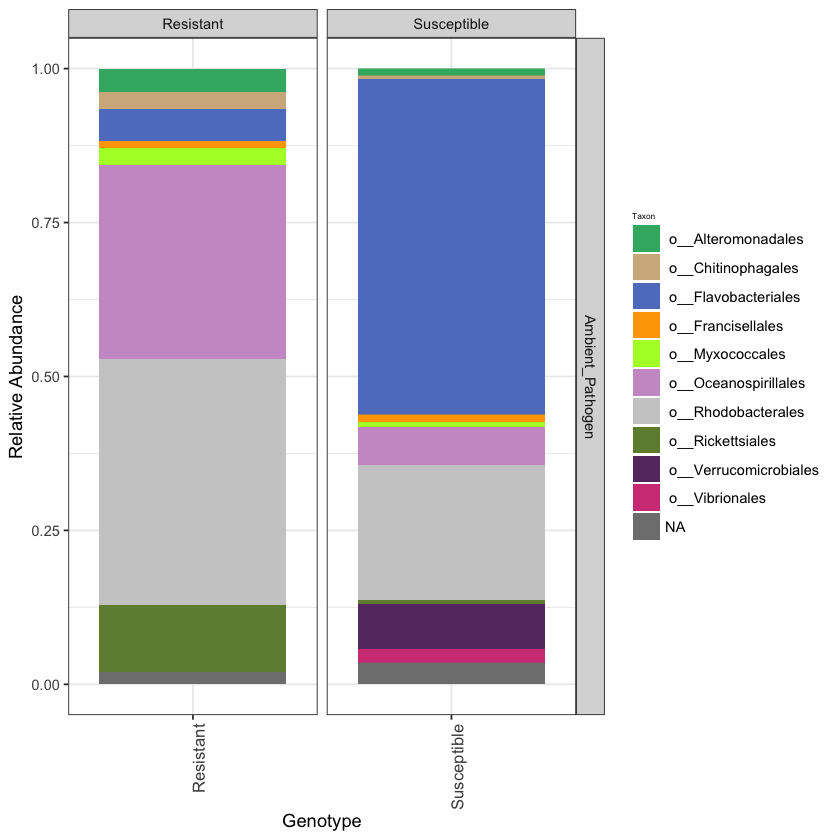

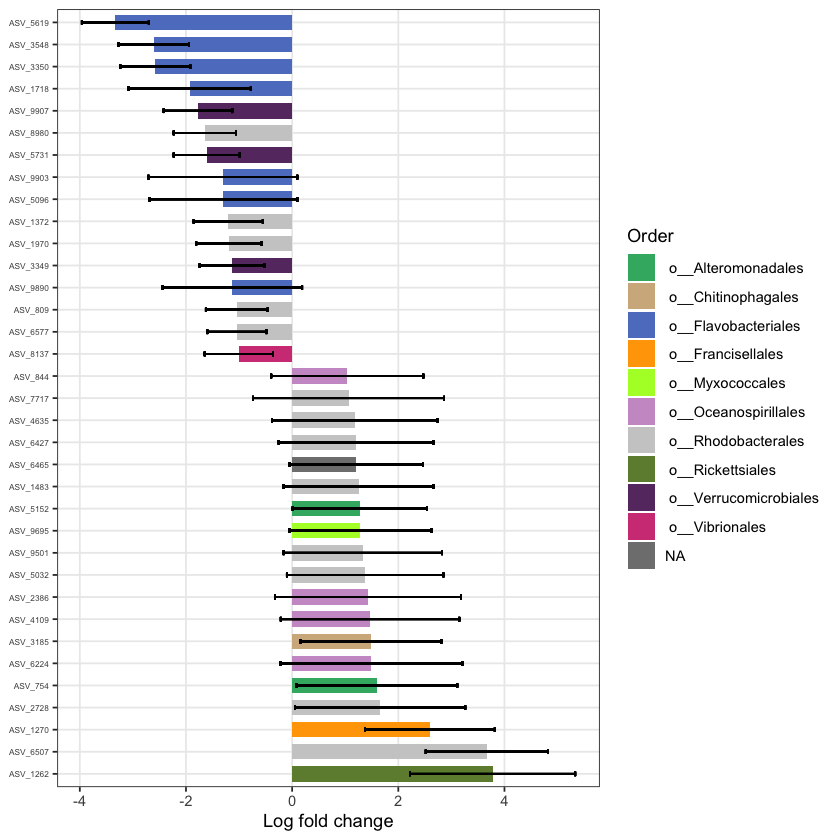

In [508]:
psr_fill_melt$Survivorship = factor(psr_fill_melt$Survivorship, levels = c("Susceptible", "Resistant"))


psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(SurvivorshipResistant) %>%
filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%
ggplot(
       aes(x=Survivorship, y= Abundance, fill=Order)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 



psr_fill_melt %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(SurvivorshipResistant) %>%
filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%

ggplot(
           aes(x = SurvivorshipResistant, y = reorder(ASVs, -SurvivorshipResistant), fill =Order)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(SurvivorshipResistant) - as.numeric(SurvivorshipResistantSD), 
xmax = as.numeric(SurvivorshipResistant) + as.numeric(SurvivorshipResistantSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"))

# Pathogen in Placebo continuous

In [182]:
out = ancombc(phyloseq = ps_fill_Am_Pa, formula = "surv", 
              p_adj_method = "BH", zero_cut = 0.90, lib_cut = 1000, 
              group = NULL, struc_zero = FALSE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, surv, survSD) #%>%
  #mutate(group = ifelse(surv > 0, "surv"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(surv)  %>%
filter(surv=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=surv)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)


res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix


ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_APa = subset_samples(ps2,
                     Combo=="Ambient_Pathogen"& Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


,taxon_id,surv
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0
2,09076d07bd26f0e323724b55aecd1f3d,0
3,9b9b0edfeba1ef3150a96dda7385c072,0
4,a24e19ec3a1891f7fee6cfa389fc09bd,0
5,babdf7a7daae9f26a7b3c530e5fe2b4f,0
6,fea4638d48e009fdfdec27a381a41b41,0


[1] 264   2

,taxon_id,survSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0
2,09076d07bd26f0e323724b55aecd1f3d,0
3,9b9b0edfeba1ef3150a96dda7385c072,0
4,a24e19ec3a1891f7fee6cfa389fc09bd,0
5,babdf7a7daae9f26a7b3c530e5fe2b4f,0
6,fea4638d48e009fdfdec27a381a41b41,0


,taxon_id,Sig
,<chr>,<lgl>
1,8c8c28d133dc228ffc7ba770eee7caba,TRUE
2,57fe1c8ee9650e492328741c8f86a925,TRUE
3,52eb7d4714a43111031b1cb7ffe49f02,TRUE
4,1fe9e2467efe49c1a32ea6ae44305e12,TRUE


Joining, by = "taxon_id"



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 4 taxa by 12 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 4 taxa by 12 taxonomic ranks ]

Warning message in psmelt(.):
“The sample variables: 
surv
 have been renamed to: 
sample_surv
to avoid conflicts with taxonomic rank names.”


In [439]:
ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!=c("U41"))
ps2



ps_ancom_APa = subset_samples(ps2,
                     Combo=="Ambient_Pathogen"& Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 63 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 63 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 63 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 63 taxa by 13 taxonomic ranks ]

Warning message:
“Removed 16 rows containing missing values (position_stack).”


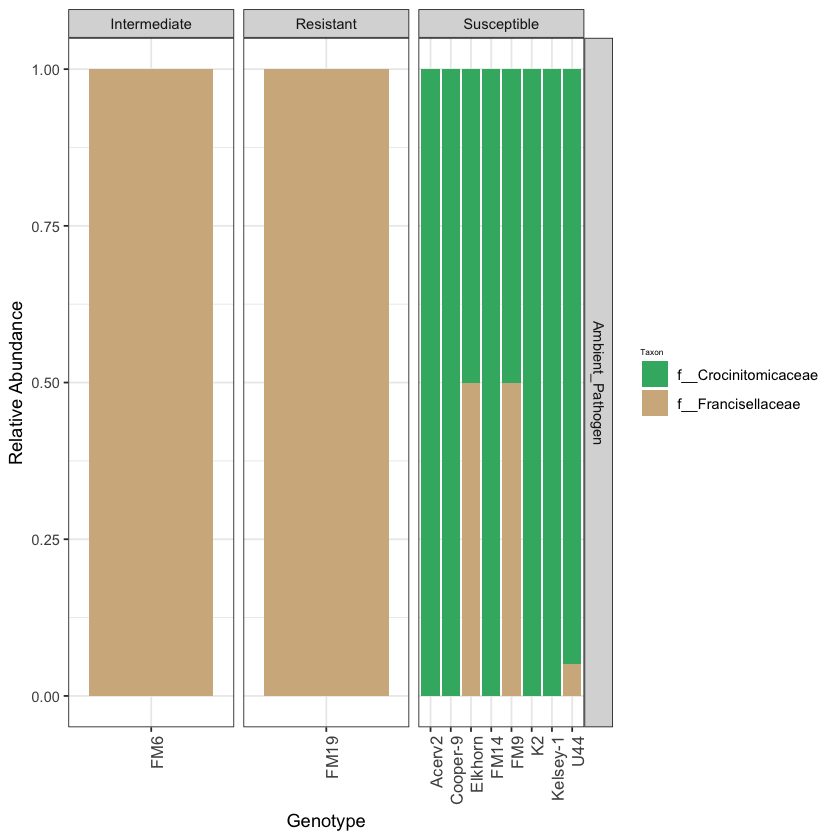

In [154]:
psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Family)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 

# Placebo in NH4 categorical 

In [309]:
out = ancombc(phyloseq = ps_fill_NH_Pl, formula = "Survivorship", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Survivorship", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = TRUE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, SurvivorshipResistant, SurvivorshipResistantSD)%>%
  mutate(group = ifelse(SurvivorshipResistant > 0, "Resistant", "Susceptible"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(SurvivorshipResistant)  %>%
filter(SurvivorshipResistant=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=SurvivorshipResistant)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_APa = subset_samples(ps2,
                     Combo=="Ambient_Pathogen"& Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,SurvivorshipResistant
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,1.469515
2,1d6420bfd9e1bec0e99d5c7764504717,1.277881
3,87ee6bb9f7b69f2b6c5f95c01db5e924,1.262917
4,d655ef1a20f564352a54c08fc716e0f1,1.246895
5,bab5d395338dc622ef84862d52ad7108,1.463138
6,09076d07bd26f0e323724b55aecd1f3d,1.479881


[1] 141   2

,taxon_id,SurvivorshipResistantSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.6989815
2,1d6420bfd9e1bec0e99d5c7764504717,0.4481971
3,87ee6bb9f7b69f2b6c5f95c01db5e924,0.4244248
4,d655ef1a20f564352a54c08fc716e0f1,0.4373052
5,bab5d395338dc622ef84862d52ad7108,0.4771265
6,09076d07bd26f0e323724b55aecd1f3d,0.4901999


,taxon_id,Sig
,<chr>,<lgl>
1,ad3a3e7c08784d4bcc776c811681ec93,TRUE
2,1d6420bfd9e1bec0e99d5c7764504717,TRUE
3,87ee6bb9f7b69f2b6c5f95c01db5e924,TRUE
4,d655ef1a20f564352a54c08fc716e0f1,TRUE
5,bab5d395338dc622ef84862d52ad7108,TRUE
6,09076d07bd26f0e323724b55aecd1f3d,TRUE


Joining, by = "taxon_id"



[1] 78  5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 78 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 78 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 78 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 78 taxa by 13 taxonomic ranks ]

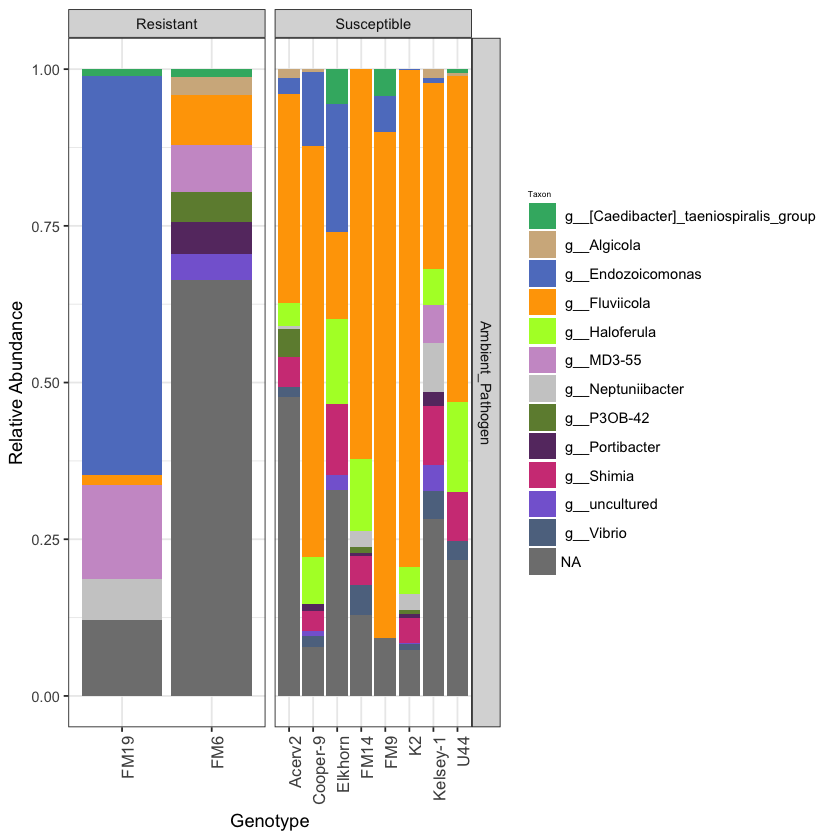

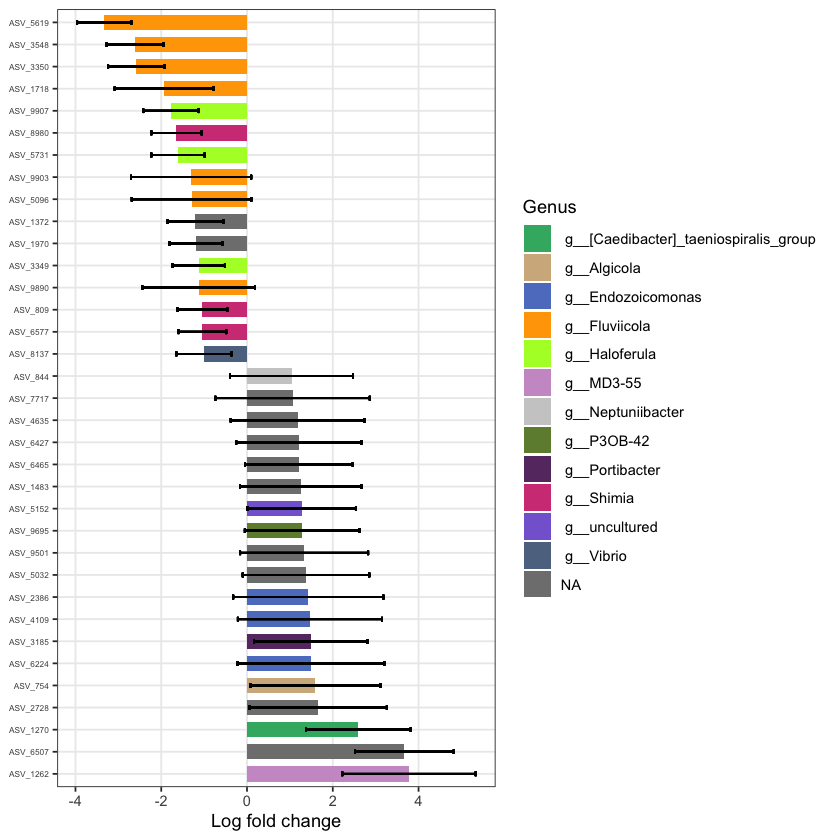

In [510]:
psr_fill_melt$Survivorship = factor(psr_fill_melt$Survivorship, levels = c("Susceptible", "Resistant"))


psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(SurvivorshipResistant) %>%
filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 



psr_fill_melt %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(SurvivorshipResistant) %>%
filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%

ggplot(
           aes(x = SurvivorshipResistant, y = reorder(ASVs, -SurvivorshipResistant), fill =Genus)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(SurvivorshipResistant) - as.numeric(SurvivorshipResistantSD), 
xmax = as.numeric(SurvivorshipResistant) + as.numeric(SurvivorshipResistantSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"))

# Placebo in NH4 continuous

In [163]:
out = ancombc(phyloseq = ps_fill_NH_Pl, formula = "surv", 
              p_adj_method = "BH", zero_cut = 0.90, lib_cut = 1000, 
              group = NULL, struc_zero = FALSE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, surv, survSD) #%>%
  #mutate(group = ifelse(surv > 0, "surv"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(surv)  %>%
filter(surv=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=surv)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)


res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix



ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_APl = subset_samples(ps2, Combo=="NH4_Placebo" & Type=="Clipped")
ps_ancom_APl = subset_samples(ps_ancom_APl, Pairs=="paired")
ps_ancom_APl

psr_fill_melt = ps_ancom_APl  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

,taxon_id,surv
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.000000
2,1d6420bfd9e1bec0e99d5c7764504717,1.523181
3,87ee6bb9f7b69f2b6c5f95c01db5e924,1.336866
4,d655ef1a20f564352a54c08fc716e0f1,1.299926
5,bab5d395338dc622ef84862d52ad7108,1.563596
6,09076d07bd26f0e323724b55aecd1f3d,1.791675


[1] 141   2

,taxon_id,survSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.0000000
2,1d6420bfd9e1bec0e99d5c7764504717,0.5781219
3,87ee6bb9f7b69f2b6c5f95c01db5e924,0.5106061
4,d655ef1a20f564352a54c08fc716e0f1,0.5255394
5,bab5d395338dc622ef84862d52ad7108,0.5777748
6,09076d07bd26f0e323724b55aecd1f3d,0.6348884


,taxon_id,Sig
,<chr>,<lgl>
1,1d6420bfd9e1bec0e99d5c7764504717,TRUE
2,87ee6bb9f7b69f2b6c5f95c01db5e924,TRUE
3,d655ef1a20f564352a54c08fc716e0f1,TRUE
4,bab5d395338dc622ef84862d52ad7108,TRUE
5,09076d07bd26f0e323724b55aecd1f3d,TRUE
6,96b452fd3bd63b0c70b038a1979a67fd,TRUE


Joining, by = "taxon_id"



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 46 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 46 taxa by 12 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 46 taxa and 39 samples ]
sample_data() Sample Data:       [ 39 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 46 taxa by 12 taxonomic ranks ]

Warning message in psmelt(.):
“The sample variables: 
surv
 have been renamed to: 
sample_surv
to avoid conflicts with taxonomic rank names.”


In [164]:
head(df_fig)

,taxon_id,surv,survSD,Sig
,<chr>,<dbl>,<dbl>,<lgl>
1,1d6420bfd9e1bec0e99d5c7764504717,1.523181,0.5781219,TRUE
2,87ee6bb9f7b69f2b6c5f95c01db5e924,1.336866,0.5106061,TRUE
3,d655ef1a20f564352a54c08fc716e0f1,1.299926,0.5255394,TRUE
4,bab5d395338dc622ef84862d52ad7108,1.563596,0.5777748,TRUE
5,09076d07bd26f0e323724b55aecd1f3d,1.791675,0.6348884,TRUE
6,96b452fd3bd63b0c70b038a1979a67fd,1.803898,0.6252601,TRUE


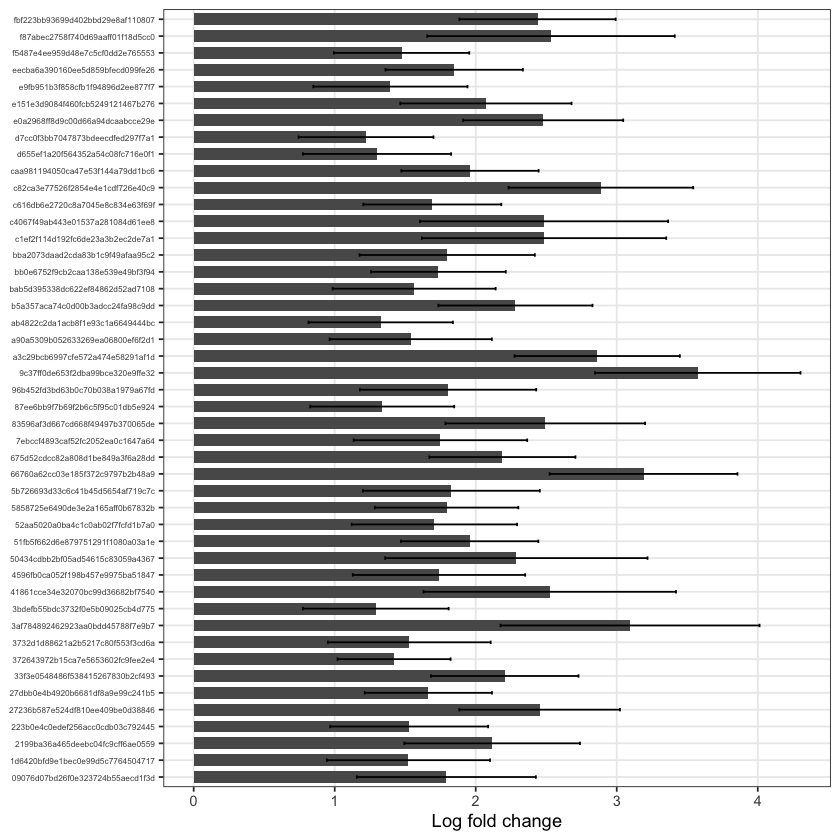

In [165]:
ggplot(data = df_fig, 
           aes(x = surv, y = taxon_id)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = surv - survSD, xmax = surv + survSD),
                width = 0.2,
                position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5))

Warning message:
“Removed 276 rows containing missing values (position_stack).”


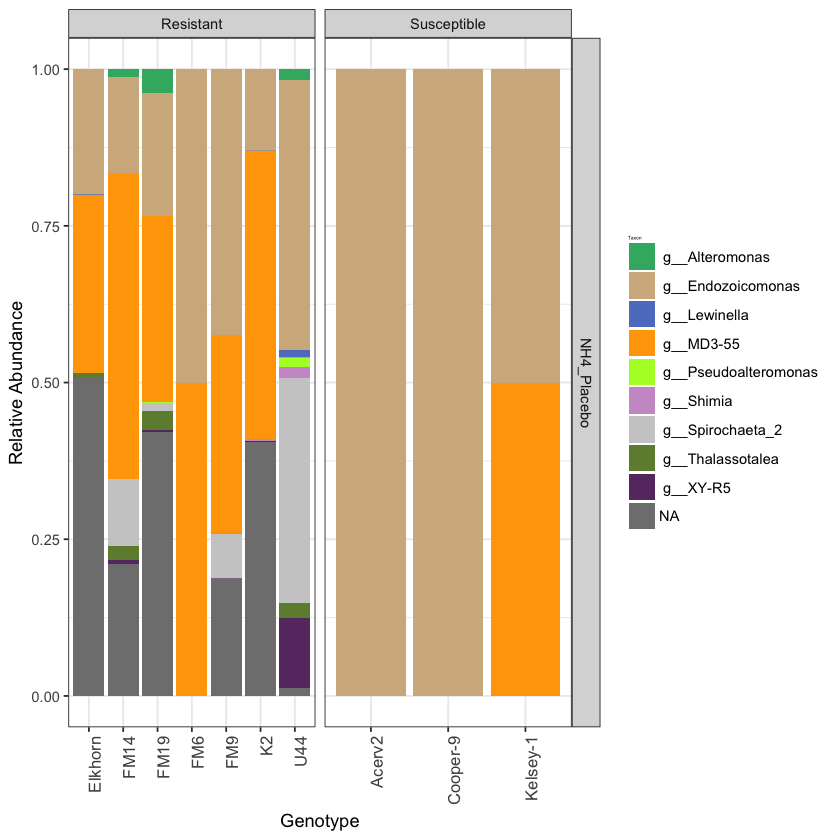

In [161]:
psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=3)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 

# NH and Pathogen categorical

In [315]:
out = ancombc(phyloseq = ps_fill_NH_Pa, formula = "Survivorship", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 1000, 
              group = "Survivorship", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.01, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, SurvivorshipResistant, SurvivorshipResistantSD)%>%
  mutate(group = ifelse(SurvivorshipResistant > 0, "Resistant", "Susceptible"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(SurvivorshipResistant)  %>%
filter(SurvivorshipResistant=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=SurvivorshipResistant)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)

dim(df_fig)

res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_APa = subset_samples(ps2,
                     Combo=="NH4_Pathogen"& Type=="Clipped")
ps_ancom_APa = subset_samples(ps_ancom_APa, Pairs=="paired")
ps_ancom_APa

psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,SurvivorshipResistant
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.8621447
2,1d6420bfd9e1bec0e99d5c7764504717,1.7364149
3,bab5d395338dc622ef84862d52ad7108,0.0000000
4,9b9b0edfeba1ef3150a96dda7385c072,-0.2436045
5,a24e19ec3a1891f7fee6cfa389fc09bd,-0.2582737
6,fea4638d48e009fdfdec27a381a41b41,-0.6486865


[1] 231   2

,taxon_id,SurvivorshipResistantSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.9862613
2,1d6420bfd9e1bec0e99d5c7764504717,1.2068052
3,bab5d395338dc622ef84862d52ad7108,0.0000000
4,9b9b0edfeba1ef3150a96dda7385c072,0.4613734
5,a24e19ec3a1891f7fee6cfa389fc09bd,0.4665942
6,fea4638d48e009fdfdec27a381a41b41,0.5122772


,taxon_id,Sig
,<chr>,<lgl>
1,ad3a3e7c08784d4bcc776c811681ec93,TRUE
2,1d6420bfd9e1bec0e99d5c7764504717,TRUE
3,9b9b0edfeba1ef3150a96dda7385c072,TRUE
4,a24e19ec3a1891f7fee6cfa389fc09bd,TRUE
5,fea4638d48e009fdfdec27a381a41b41,TRUE
6,6814d83c921ece2808ef7e0bd8c284a7,TRUE


Joining, by = "taxon_id"



[1] 148   5

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 148 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 148 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 148 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 148 taxa by 13 taxonomic ranks ]

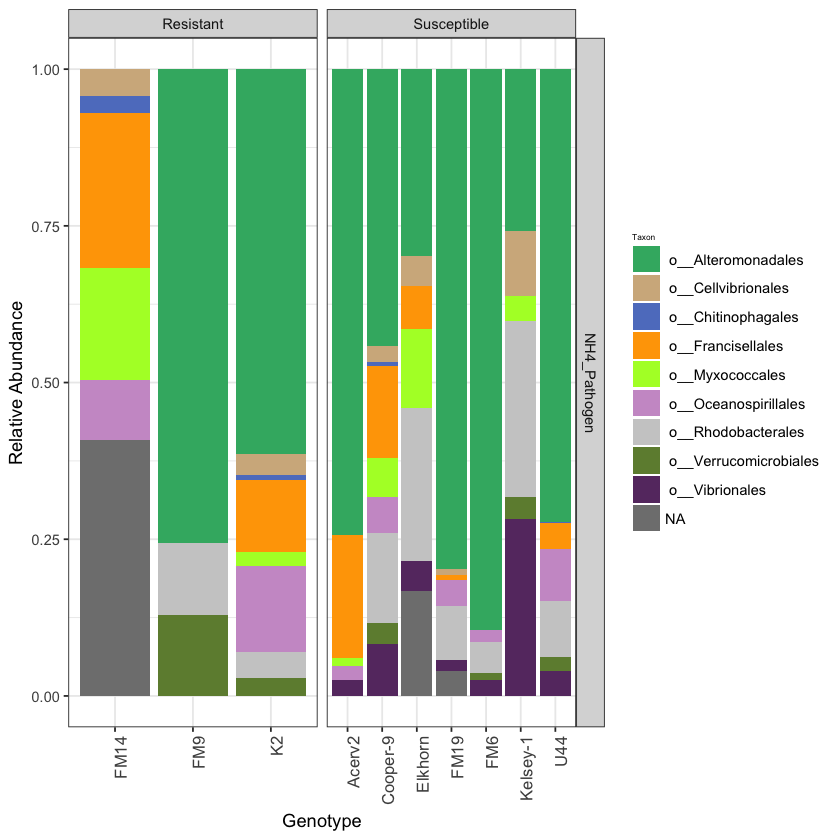

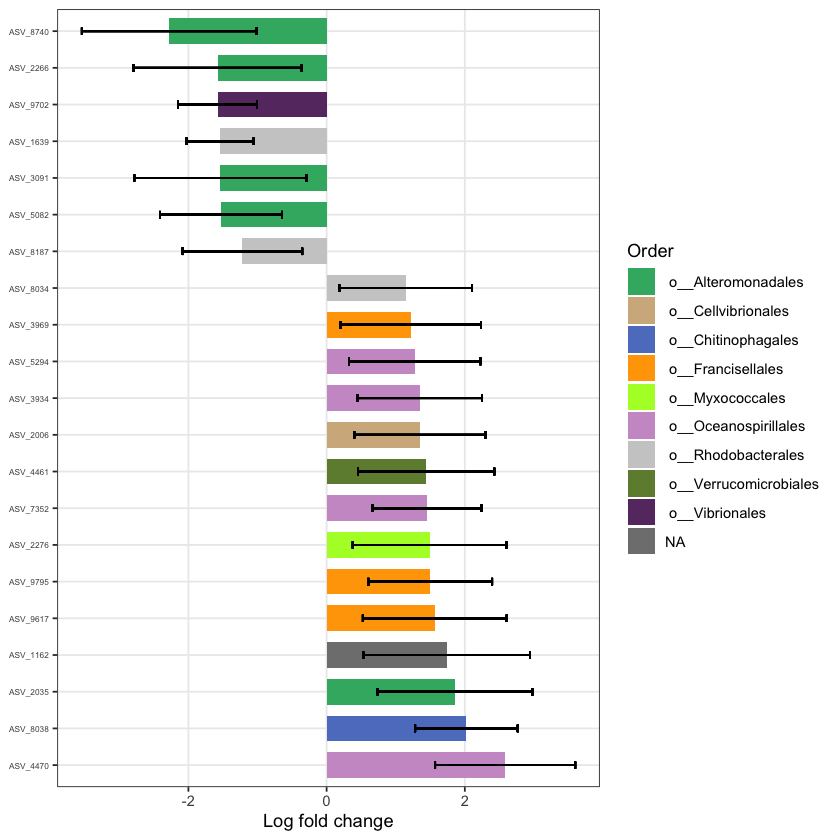

In [316]:
psr_fill_melt$Survivorship = factor(psr_fill_melt$Survivorship, levels = c("Susceptible", "Resistant"))


psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(SurvivorshipResistant) %>%
filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Order)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 



psr_fill_melt %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
arrange(SurvivorshipResistant) %>%
filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%

ggplot(
           aes(x = SurvivorshipResistant, y = reorder(ASVs, -SurvivorshipResistant), fill =Order)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(SurvivorshipResistant) - as.numeric(SurvivorshipResistantSD), 
xmax = as.numeric(SurvivorshipResistant) + as.numeric(SurvivorshipResistantSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"))

In [226]:
ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125"))
ps2= subset_samples(ps2, Genotype!="U41")
ps2


ps_ancom_NPa = subset_samples(ps2,
                     Combo=="NH4_Pathogen"& Type== "Clipped")
ps_ancom_NPa


psr_fill_melt = ps_ancom_NPa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 96 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 96 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 96 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 96 taxa by 13 taxonomic ranks ]

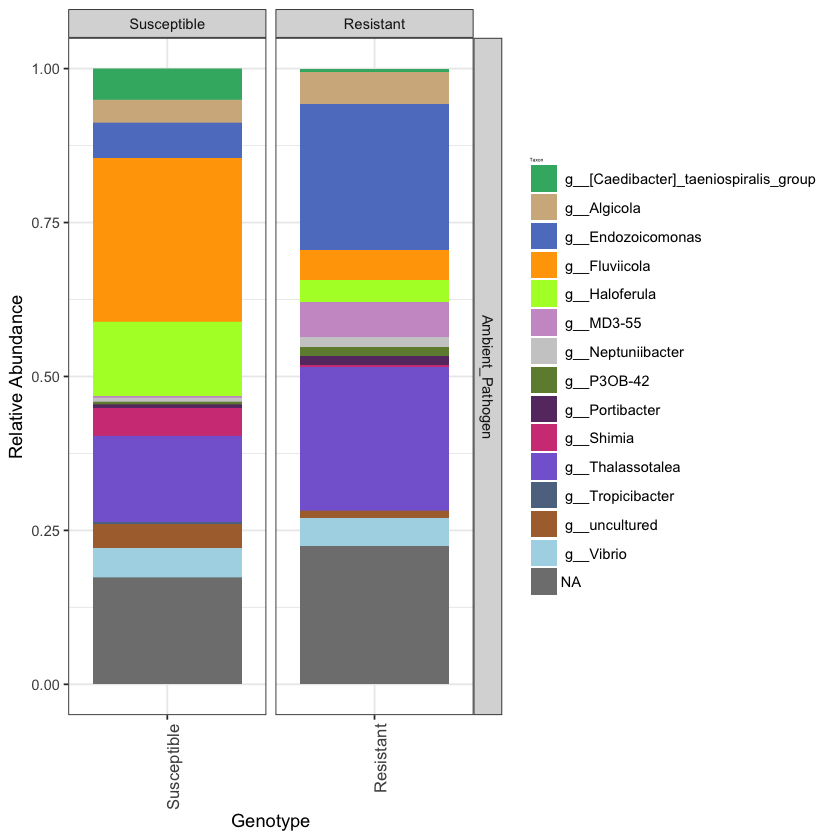

In [506]:
psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=Survivorship, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=3)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 

# NH4 and Pathoogen continuous

In [145]:
out = ancombc(phyloseq = ps_fill_NH_Pa, formula = "surv", 
              p_adj_method = "BH", zero_cut = 0.90, lib_cut = 1000, 
              group = NULL, struc_zero = FALSE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, surv, survSD) #%>%
  #mutate(group = ifelse(surv > 0, "surv"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(surv)  %>%
filter(surv=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=surv)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)


res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix



ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_A = subset_samples(ps2, Combo=="NH4_Pathogen" & Type=="Clipped")
ps_ancom_APl = subset_samples(ps_ancom_APl, Pairs=="paired")
ps_ancom_APl

psr_fill_melt = ps_ancom_APl  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

,taxon_id,surv
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0
2,1d6420bfd9e1bec0e99d5c7764504717,0
3,bab5d395338dc622ef84862d52ad7108,0
4,9b9b0edfeba1ef3150a96dda7385c072,0
5,a24e19ec3a1891f7fee6cfa389fc09bd,0
6,fea4638d48e009fdfdec27a381a41b41,0


[1] 231   2

,taxon_id,survSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0
2,1d6420bfd9e1bec0e99d5c7764504717,0
3,bab5d395338dc622ef84862d52ad7108,0
4,9b9b0edfeba1ef3150a96dda7385c072,0
5,a24e19ec3a1891f7fee6cfa389fc09bd,0
6,fea4638d48e009fdfdec27a381a41b41,0


taxon_id,Sig
<chr>,<lgl>


Joining, by = "taxon_id"



ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [1] not equal to array extent


In [389]:
melt_ps_Am_Pl_ALL = ps_Am_Pl_ALL  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt() 

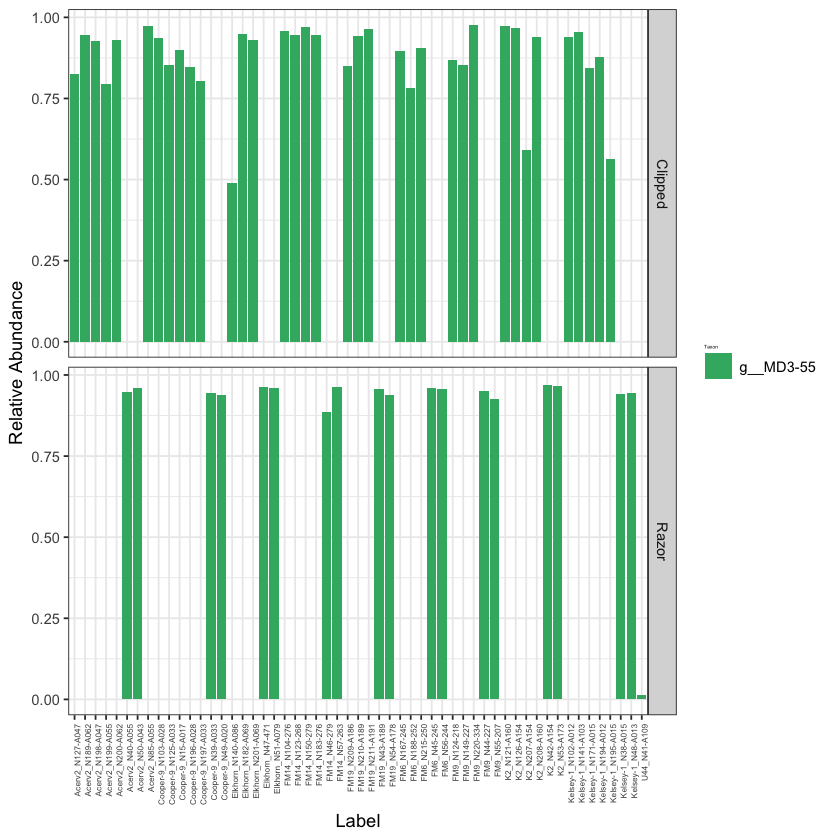

In [406]:
melt_ps_Am_Pl_ALL %>%
filter(Genus==" g__MD3-55") %>%
filter(Abundance >= 0.01) %>%
ggplot(
       aes(x=Label, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="stack") +
facet_grid(Type~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=3)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
#xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=5)) 

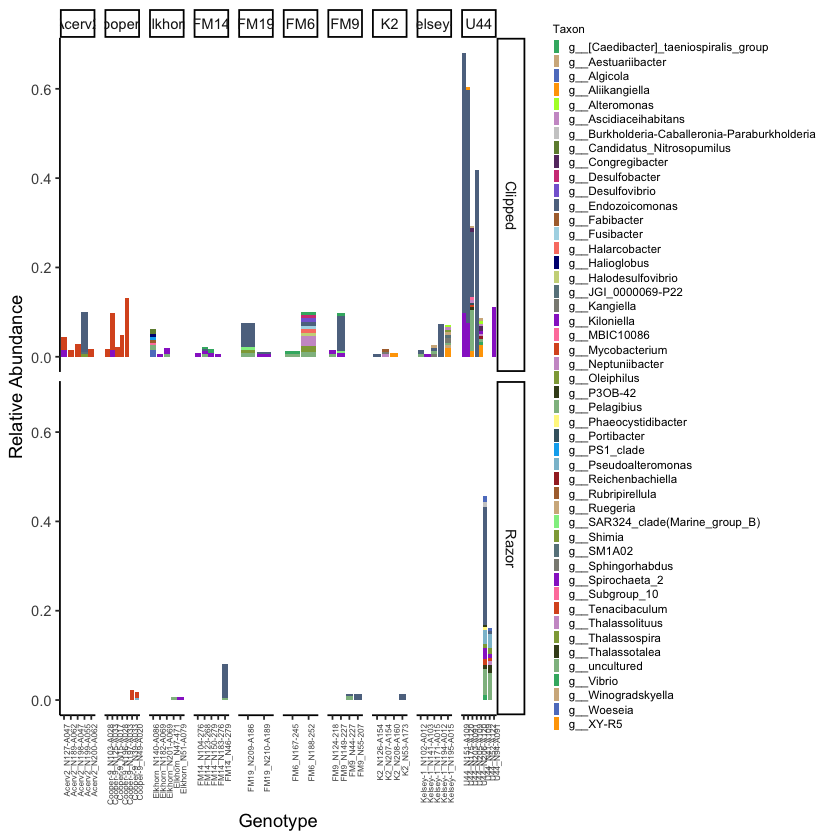

In [476]:
melt_ps_Am_Pl_ALL %>%
filter(Genus!=" g__MD3-55") %>%
filter(Abundance >= 0.005) %>%
ggplot(
       aes(x=Label, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="stack") +
facet_grid(Type~Genotype, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=3)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.60, ncol=1)) +
theme_classic() +
theme(legend.text =element_text(size=7)) +
theme(legend.title =element_text(size=7)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=5)) 

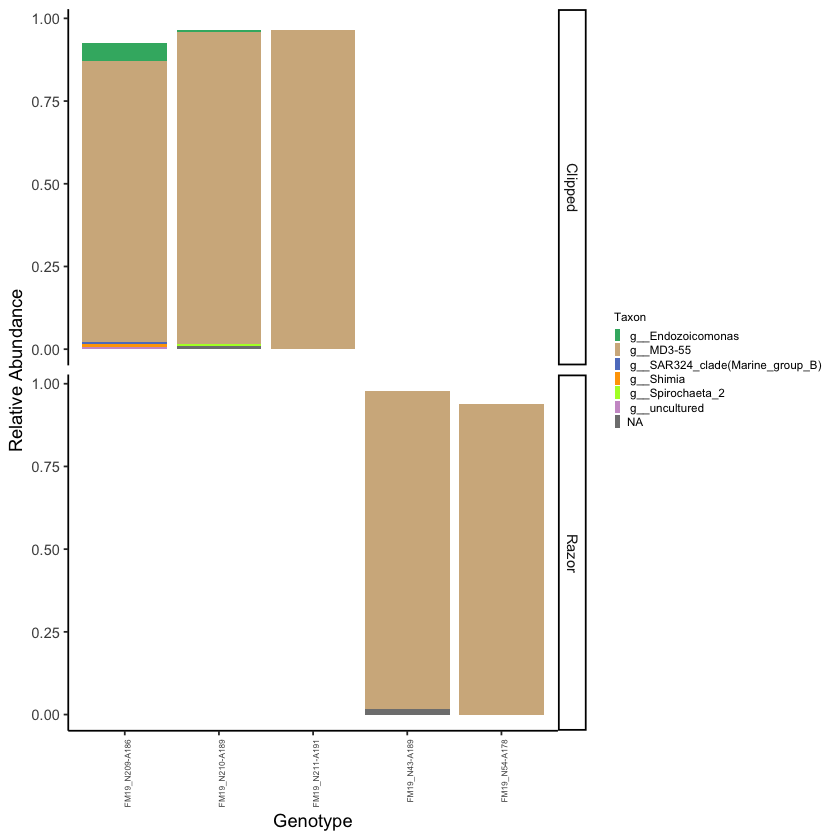

In [404]:
melt_ps_Am_Pl_ALL %>%
#filter(Genus!=" g__MD3-55") %>%
filter(Abundance >= 0.005) %>%
filter(Genotype == "FM19") %>%
ggplot(
       aes(x=Label, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="stack") +
facet_grid(Type~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=3)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.60, ncol=1)) +
theme_classic() +
theme(legend.text =element_text(size=7)) +
theme(legend.title =element_text(size=7)) +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=5)) 

In [479]:
out = ancombc(phyloseq = ps_Am_Pl_ALL, formula = "NH4_Susceptibility", 
              p_adj_method = "holm", zero_cut = 0.90, lib_cut = 1000, 
              group = "NH4_Susceptibility", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NH4_SusceptibilitySusceptible, NH4_SusceptibilitySusceptibleSD)%>%
  mutate(group = ifelse(NH4_SusceptibilitySusceptible > 0, "Resistant", "Susceptible"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NH4_SusceptibilitySusceptible)  %>%
filter(NH4_SusceptibilitySusceptible=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NH4_SusceptibilitySusceptible)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)


res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix


ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_APa = subset_samples(ps2,
                     Combo=="Ambient_Placebo")

ps_ancom_APa
psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,NH4_SusceptibilitySusceptible
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.0000000
2,1d6420bfd9e1bec0e99d5c7764504717,0.0000000
3,87ee6bb9f7b69f2b6c5f95c01db5e924,0.3116188
4,d655ef1a20f564352a54c08fc716e0f1,-0.5448618
5,2d6f7455e9e2d0486c87f547abeaf1e8,0.0000000
6,bab5d395338dc622ef84862d52ad7108,0.0000000


[1] 100   2

,taxon_id,NH4_SusceptibilitySusceptibleSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.0000000
2,1d6420bfd9e1bec0e99d5c7764504717,0.0000000
3,87ee6bb9f7b69f2b6c5f95c01db5e924,0.6965292
4,d655ef1a20f564352a54c08fc716e0f1,0.6383313
5,2d6f7455e9e2d0486c87f547abeaf1e8,0.0000000
6,bab5d395338dc622ef84862d52ad7108,0.0000000


,taxon_id,Sig
,<chr>,<lgl>
1,87ee6bb9f7b69f2b6c5f95c01db5e924,TRUE
2,d655ef1a20f564352a54c08fc716e0f1,TRUE
3,a24e19ec3a1891f7fee6cfa389fc09bd,TRUE
4,c4ba45067e12fe7ff43a334c839aded4,TRUE
5,2180b5f4284c6a69ed3d7f81ccf42793,TRUE
6,77a41ebaedcc95e60d850850efcc09de,TRUE


Joining, by = "taxon_id"



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 44 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 44 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 44 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 44 taxa by 13 taxonomic ranks ]

Warning message:
“Removed 162 rows containing missing values (geom_bar).”


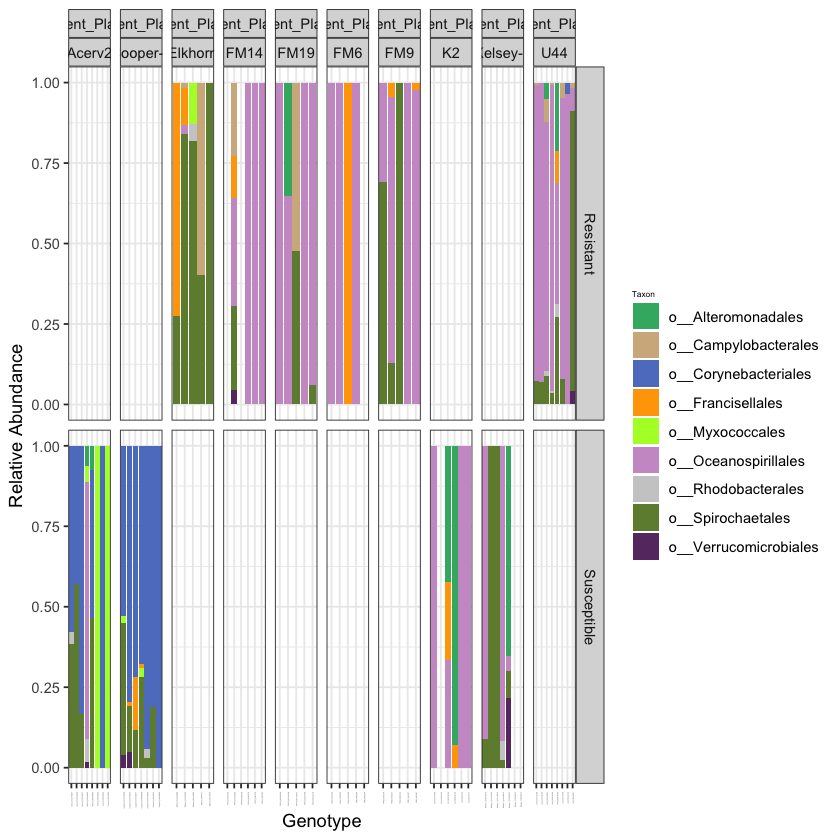

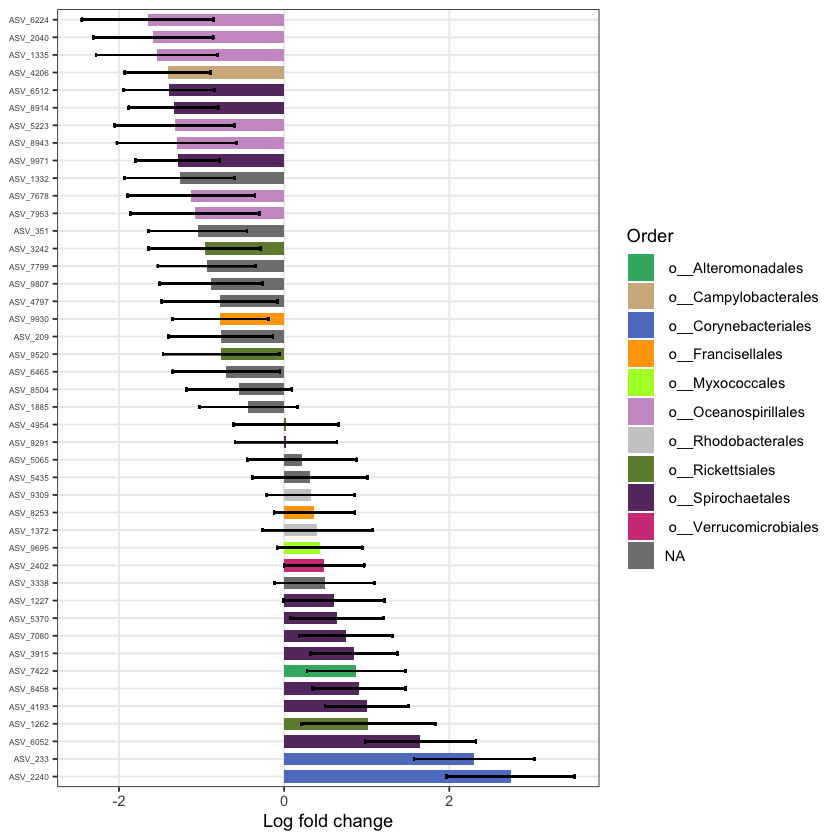

In [481]:


psr_fill_melt %>%
filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
#as.data.frame %>%
#mutate_all(type.convert) %>%
#mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%
ggplot(
       aes(x=Label, y= Abundance, fill=Order)) + 
geom_bar(stat = "identity",position="fill") +
facet_grid(NH4_Susceptibility~Combo*Genotype, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=1)) 



psr_fill_melt %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%

ggplot(
           aes(x = NH4_SusceptibilitySusceptible, y = reorder(ASVs, -NH4_SusceptibilitySusceptible), fill =Order)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(NH4_SusceptibilitySusceptible) - as.numeric(NH4_SusceptibilitySusceptibleSD), 
xmax = as.numeric(NH4_SusceptibilitySusceptible) + as.numeric(NH4_SusceptibilitySusceptibleSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                          "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"))

In [483]:

out = ancombc(phyloseq = ps_Am_Pl_ALL, formula = "Disease_Susceptibility", 
              p_adj_method = "BH", zero_cut = 0.90, lib_cut = 1000, 
              group = "Disease_Susceptibility", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, Disease_SusceptibilitySusceptible, Disease_SusceptibilitySusceptibleSD)%>%
  mutate(group = ifelse(Disease_SusceptibilitySusceptible > 0, "Resistant", "Susceptible"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(Disease_SusceptibilitySusceptible)  %>%
filter(Disease_SusceptibilitySusceptible=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=Disease_SusceptibilitySusceptible)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)


res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix


ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% dups & Genotype!="U41")
ps2



ps_ancom_APa = subset_samples(ps2,
                     Combo=="Ambient_Placebo")

ps_ancom_APa
psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,Disease_SusceptibilitySusceptible
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.0000000
2,1d6420bfd9e1bec0e99d5c7764504717,-0.9785043
3,87ee6bb9f7b69f2b6c5f95c01db5e924,-1.2314834
4,d655ef1a20f564352a54c08fc716e0f1,0.0000000
5,2d6f7455e9e2d0486c87f547abeaf1e8,-3.2648730
6,bab5d395338dc622ef84862d52ad7108,0.0000000


[1] 100   2

,taxon_id,Disease_SusceptibilitySusceptibleSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.000000
2,1d6420bfd9e1bec0e99d5c7764504717,1.098736
3,87ee6bb9f7b69f2b6c5f95c01db5e924,1.129866
4,d655ef1a20f564352a54c08fc716e0f1,0.000000
5,2d6f7455e9e2d0486c87f547abeaf1e8,1.237403
6,bab5d395338dc622ef84862d52ad7108,0.000000


,taxon_id,Sig
,<chr>,<lgl>
1,1d6420bfd9e1bec0e99d5c7764504717,TRUE
2,87ee6bb9f7b69f2b6c5f95c01db5e924,TRUE
3,2d6f7455e9e2d0486c87f547abeaf1e8,TRUE
4,15da1483a1fa23ee78ee6cc1439a85a7,TRUE
5,09076d07bd26f0e323724b55aecd1f3d,TRUE
6,a24e19ec3a1891f7fee6cfa389fc09bd,TRUE


Joining, by = "taxon_id"



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 78 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 78 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 78 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 78 taxa by 13 taxonomic ranks ]

Warning message:
“Removed 136 rows containing missing values (geom_bar).”


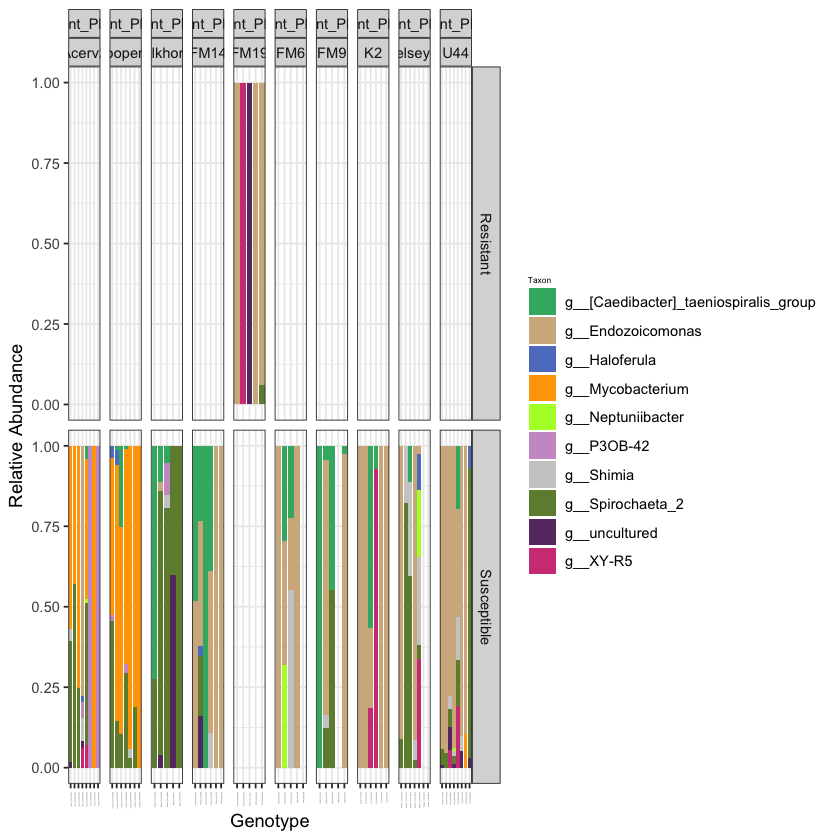

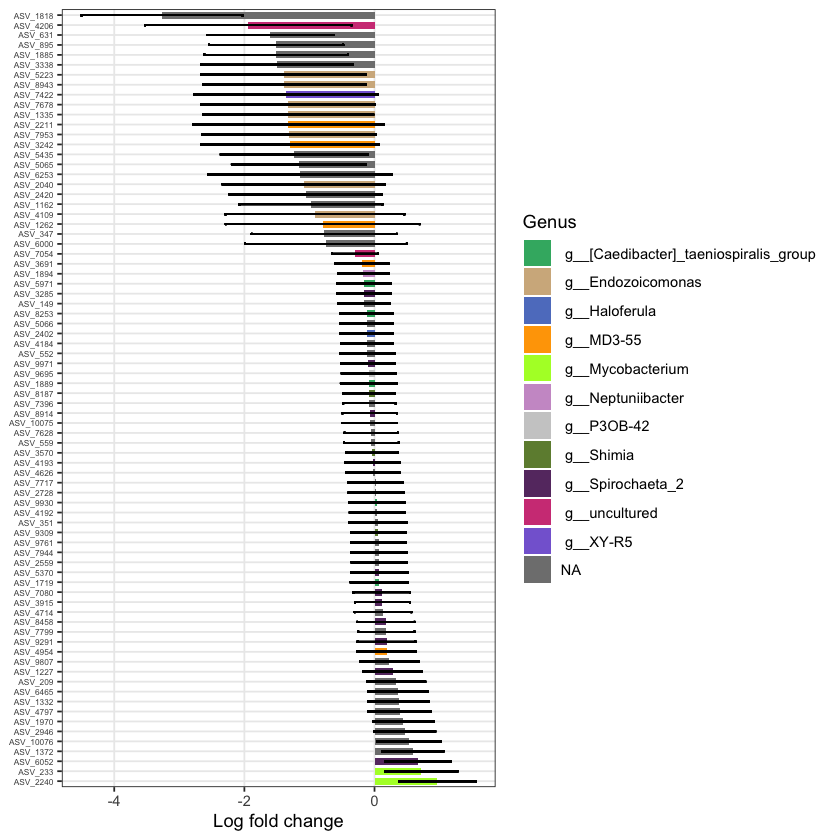

In [485]:
psr_fill_melt %>%
filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
#as.data.frame %>%
#mutate_all(type.convert) %>%
#mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(Disease_Susceptibility > 1 | Disease_Susceptibility <= -1)  %>%
ggplot(
       aes(x=Label, y= Abundance, fill=Genus)) + 
geom_bar(stat = "identity",position="fill") +
facet_grid(Disease_Susceptibility~Combo*Genotype, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=1)) 



psr_fill_melt %>%
as.data.frame %>%
mutate_all(type.convert) %>%
mutate_if(is.factor, as.character) %>%
#arrange(SurvivorshipResistant) %>%
#filter(SurvivorshipResistant > 1 | SurvivorshipResistant <= -1)  %>%

ggplot(
           aes(x = Disease_SusceptibilitySusceptible, y = reorder(ASVs, -Disease_SusceptibilitySusceptible),
               fill =Genus)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(Disease_SusceptibilitySusceptible) - as.numeric(Disease_SusceptibilitySusceptibleSD), 
xmax = as.numeric(Disease_SusceptibilitySusceptible) + as.numeric(Disease_SusceptibilitySusceptibleSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) +
#facet_wrap(Genotype~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1")) 
